# LATAR BELAKANG

Perusahaan Supermarket XYZ merupakan salah satu perusahaan ritel terkemuka yang fokus pada layanan pelanggan dan penawaran produk-produk berkualitas. Dalam upaya untuk memahami preferensi pelanggan dan meningkatkan pengalaman belanja, perusahaan melakukan analisis mendalam terhadap data pelanggan yang terkait dengan kebiasaan belanja, respon terhadap promosi, serta karakteristik demografis mereka.

# Pernyataan Masalah

Perusahaan Supermarket XYZ berkomitmen untuk meningkatkan pemahaman terhadap perilaku belanja pelanggan guna meningkatkan kepuasan mereka. Namun, perusahaan mebutuhkan informasi untuk mendukung pengambilan keputusan. Sebagai seorang data analyst, kita akan mencoba menjawab beberapa permasalahan berikut:  
    1. Bagaimana prefererensi pembelian berdasarkan profil pelanggan?  
    2. Bagaimana evaluasi penjualan pada setiap media penjualan yang telah dilakukan?  
    3. Bagaimana efektivitas promosi yang telah dilakukan?  
    

# Data

Untuk menjawab permasalahan tersebut, kita dapat memanfaatkan data penjualan per pelanggan yang telah dikumpulkan oleh Supermarket XYZ. Dataset dapat diakses [di sini.](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pemanggilan data
data = pd.read_csv("D:/Purwadika/Capstone 2/Supermarket Customers tes.csv",sep=';')

Data ini merupakan data yang menggambarkan profil pelanggan dari supermarket. Data ini mencakup informasi seperti ID pelanggan, tahun kelahiran, pendidikan, status pernikahan, pendapatan tahunan rumah tangga, jumlah anak-anak dan remaja dalam rumah tangga pelanggan, tanggal pendaftaran pelanggan di perusahaan, waktu terakhir pembelian, status keluhan dalam 2 tahun terakhir, serta informasi pembelian produk seperti jumlah pengeluaran dalam 2 tahun terakhir untuk berbagai jenis produk seperti anggur, buah-buahan, daging, ikan, permen, dan emas.

Selain itu, data juga mencakup informasi tentang aktivitas promosi, seperti jumlah pembelian dengan diskon, serta apakah pelanggan menerima atau menolak tawaran dalam berbagai kampanye promosi. Terakhir, terdapat informasi tentang tempat pembelian, termasuk jumlah pembelian melalui situs web perusahaan, katalog, dan langsung di toko, serta jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir.

Berikut adalah variabel-variabel yang terdapat dalam dataset.

**People**  
**ID**: ID unik pelanggan.  
**Year_Birth**: Tahun kelahiran pelanggan.  
**Education**: Tingkat pendidikan pelanggan.  
**Marital_Status**: Status pernikahan pelanggan.  
**Income**: Pendapatan tahunan rumah tangga pelanggan.  
**Kidhome**: Jumlah anak-anak dalam rumah tangga pelanggan.  
**Teenhome**: Jumlah remaja dalam rumah tangga pelanggan.  
**Dt_Customer**: Tanggal pendaftaran pelanggan dengan perusahaan.  
**Recency**: Jumlah hari sejak pembelian terakhir pelanggan.  
**Complain**: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak.

**Products**  
**MntWines**: Total pengeluaran pada anggur dalam 2 tahun terakhir.  
**MntFruits**: Total pengeluaran pada buah-buahan dalam 2 tahun terakhir.  
**MntMeatProducts**: Total pengeluaran pada daging dalam 2 tahun terakhir.  
**MntFishProducts**: Total pengeluaran pada ikan dalam 2 tahun terakhir.  
**MntSweetProducts**: Total pengeluaran pada permen dalam 2 tahun terakhir.  
**MntGoldProds**: Total pengeluaran pada emas dalam 2 tahun terakhir.  

**Promotion**  
**NumDealsPurchases**: Jumlah pembelian dengan diskon.  
**AcceptedCmp1 - AcceptedCmp5**: 1 jika pelanggan menerima tawaran dalam kampanye promosi tertentu, 0 jika tidak.  
**Response**: 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 jika tidak.  

**Place**  
**NumWebPurchases**: Jumlah pembelian melalui situs web perusahaan.  
**NumCatalogPurchases**: Jumlah pembelian menggunakan katalog.  
**NumStorePurchases**: Jumlah pembelian langsung di toko.  
**NumWebVisitsMonth**: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir.  

Berikut adalah 5 baris pertama dan terakhir dari dataset

In [3]:
display(data.head(),data.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1


# Data Understanding dan Cleaning

Sebelum mulai menganalisis data, penting bagi kita untuk memahami dataset secara mendalam dalam tahap pemahaman data. Dari proses ini, kita akan mengidentifikasi berbagai anomali yang mungkin ada dalam dataset dan akan memerlukan perbaikan dalam tahap pembersihan data. Setiap langkah yang diambil untuk menangani anomali akan didukung oleh penjelasan yang kuat, baik berdasarkan pengetahuan domain maupun analisis statistik.

In [4]:
print(f'Jumlah baris dan kolom di dataset supermarket adalah {data.shape}')
data.info()

Jumlah baris dan kolom di dataset supermarket adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         224

Dataset supermarket ini terdiri dari 2240 baris dan 29 kolom. Dataset ini mencakup berbagai informasi, termasuk data seperti ID pelanggan, tahun kelahiran, pendidikan, status perkawinan, pendapatan, serta detail pembelian dan respons terhadap kampanye promosi. Terdapat beberapa kolom dengan data yang tidak lengkap, seperti kolom 'Income', yang memiliki 2216 entri non-null.

In [5]:
np.sum(data.isnull())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

24 data kosong pada variabel income akan kita imputasi. Karena datanya bersifat kontinu, kita akan menggunakan mean atau median sebagai teknik imputasi. Untuk menentukan metode imputasi yang tepat, perlu melihat distribusi datanya. Jika distribusinya normal, maka kita dapat menggunakan mean, namun jika distribusinya tidak normal, maka kita akan menggunakan median.

In [6]:
from scipy.stats import shapiro

# Melakukan uji Shapiro-Wilk untuk kolom 'Income'
stat, p = shapiro(data['Income'])

# Menampilkan hasil uji normalitas
alpha = 0.05
if p > alpha:
    print("Data 'Income' terdistribusi normal (tidak dapat menolak H0)")
else:
    print("Data 'Income' tidak terdistribusi normal (menolak H0)")


Data 'Income' terdistribusi normal (tidak dapat menolak H0)


Karena data Income berdistribusi normal maka kita bisa imputasi dengan mean.

In [7]:
data['Income']=data['Income'].fillna(data['Income'].mean())
np.sum(data.isnull())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Setelah melakukan imputasi pada nilai kosong pada variabel income, kita dapat melihat bahwa semua missing value telah terisi dan tidak ada lagi variabel yang memiliki nilai yang kosong. Selanjutnya, kita akan mengecek deskripsi serta isi unik dari setiap variabel.

In [8]:
display(data.describe(), data.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31/08/2012
freq,1127,864,12


In [9]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1975,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 52247.25135379061, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04/09/2012, 08/03/2014, 21/08/2013, 10/02/2014, 19/01/2014, 09/09/2013, 13/11/2012, 08/05/2013, 06/06/2013, 13/03/2014, 15/11/2013, 10/10/2012, 24/11/2012, 24/12/2012, 31/08/2012, 28/03/2013, 03/11/2012, 08/08/2012, 06/01/2013, 23/12/2012, 11/01/2014, 18/03/2013, 02/01/2013, 27/05/2013, 20/02/2013, 31/05/2013, 22/11/2013, 22/05/2014, 11/05/2013, 29/10/2012, 29/08/2013, 31/12/2013, 02/09/2013, 11/02/2014, 01/02/2013, 29/04/2013, 12/03/2013, 05/11/2013, 02/10/2013, 28/06/2014, 09/11/2012, 24/05/2013, 01/01/2014, 08/11/2012, 12/05/2014, 11/08/2012, 07/06/2014, 12/06/2013, 19/11/2012, 02/04/2013, 28/04/2014, 17/06/2013, 03/03/2014, 04/07/2013, 07/09/2012, 18/02/2013, 11/06/2013, 06/12/2013, 21/05/2013, 11/05/2014, 19/03/2014, 27/09/2013, 08/04/2013, 11/09/2012, 14/09/2012, 17/03/2013, 05/04/2013, 30/04/2014, 19/12/2012, 27/08/2012, 12/10/2012, 04/09/2013, 29/08/2012, 23/06/2013, 03/07/2013, 25/02/2014, 11/08/2013, 16/07/2013, 28/05/2014, 21/01/2014, 27/05/2014, 23/11/2013, 23/03/2014, 24/05/2014, 22/11/2012, 11/04/2013, 01/12/2013, 20/06/2013, 23/07/2013, 30/03/2014, 20/04/2013, 17/05/2013, 08/05/2014, 10/12/2013, 24/09/2013, 02/02/2013, 07/12/2012, 02/11/2013, 10/11/2012, 25/06/2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 6

Secara umum, selain variabel income yang memiliki missing value, ada 2 variabel yang memerlukan perbaikan. Variabel 'education' memiliki kategori '2n Cycle', yang kita anggap setara dengan kategori 'Master', sehingga akan kita gabungkan menjadi satu kategori, yaitu 'Master'. Sedangkan untuk variabel 'marital status', terdapat banyak kategori yang nantinya akan kita gabungkan menjadi 2 kategori, yaitu 'Single' dan 'Together'. Kategori 'SIngle' terdiri dari 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd', dan 'YOLO', sementara kategori 'Together' terdiri dari 'Together' dan 'Married'.

In [10]:
# Menghitung jumlah pelanggan berdasarkan tingkat pendidikan
education_counts = data['Education'].value_counts()

# Menampilkan jumlah pelanggan berdasarkan tingkat pendidikan
print(education_counts)


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [11]:
#diasumsikan 2n cycle sama dengan master, maka kita ganti data 2n Cycle dengan master

# Mengganti '2n Cycle' menjadi 'Master' dalam kolom 'Education'
data['Education'] = data['Education'].replace('2n Cycle', 'Master')

# Memeriksa hasil penggantian
print(data['Education'].value_counts())


Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64


Dari distribusi jumlah pelanggan berdasarkan tingkat pendidikan sebelum dan setelah penggantian '2n Cycle' menjadi 'Master', terlihat bahwa sebelum perubahan terdapat 203 pelanggan dalam kategori '2n Cycle', yang kemudian digantikan menjadi 'Master'. Setelah penggantian, jumlah pelanggan dalam kategori 'Master' meningkat menjadi 573. Interpretasinya adalah kita telah menggabungkan kategori '2n Cycle' ke dalam kategori 'Master' untuk memperjelas dan memudahkan analisis berdasarkan tingkat pendidikan, sehingga sekarang terdapat 573 pelanggan dengan tingkat pendidikan 'Master'. Ini membantu untuk membuat kategori lebih representatif dan mudah dipahami.

Selanjutnya kita buat untuk variabel marital status

In [12]:
marital_counts = data['Marital_Status'].value_counts()
print(data['Marital_Status'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [13]:
#mengubah data hanya menjadi 2 kategori yaitu single dan together.
data['Marital_Status'] = data['Marital_Status'].replace('Married', 'Together')
data['Marital_Status'] = data['Marital_Status'].replace('Divorced', 'Single')
data['Marital_Status'] = data['Marital_Status'].replace('Widow', 'Single')
data['Marital_Status'] = data['Marital_Status'].replace('Alone', 'Single')
data['Marital_Status'] = data['Marital_Status'].replace('Absurd', 'Single')
data['Marital_Status'] = data['Marital_Status'].replace('YOLO', 'Single')

print(data['Marital_Status'].value_counts())

Together    1444
Single       796
Name: Marital_Status, dtype: int64


Kategori 'Marital_Status' yang sebelumnya bervariasi seperti 'Married', 'Divorced', 'Widow', dan lainnya telah digabungkan menjadi hanya dua kategori, yaitu 'Single' dan 'Together'. Setelah penggabungan, terdapat 1444 pelanggan dalam kategori 'Together' dan 796 pelanggan dalam kategori 'Single'. Hal ini dilakukan untuk mempermudah pemahaman data serta mengurangi kompleksitas kategori yang ada.

Selanjutnya kita akan membuat variabel baru yang merupakan hasil penjumlahan dari sejumlah kategori pembelian, yakni 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', dan 'MntGoldProds'. Variabel baru ini akan dinamakan sebagai 'Total_Purchase', memungkinkan analisis yang lebih mudah terhadap total belanja pelanggan dari berbagai kategori produk.

In [16]:
# Menambahkan kolom baru Total_Purchase yang merupakan jumlah dari semua jenis pembelian
data['Total_Purchase'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Memeriksa data untuk memastikan variabel baru sudah ditambahkan
print(data[['Total_Purchase', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head())

   Total_Purchase  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0            1617       635         88              546              172   
1              27        11          1                6                2   
2             776       426         49              127              111   
3              53        11          4               20               10   
4             422       173         43              118               46   

   MntSweetProducts  MntGoldProds  
0                88            88  
1                 1             6  
2                21            42  
3                 3             5  
4                27            15  


In [17]:
data.to_csv("D:/Purwadika/Capstone 2/dataclean.csv")

# ANALISIS DATA

Setelah menyelesaikan tahap pemahaman dan pembersihan data, kita sekarang siap untuk melakukan analisis pada data yang telah dipersiapkan. Fokus analisis akan difokuskan pada penyelesaian dari 3 rumusan masalah:  

1. Bagaimana prefererensi pembelian berdasarkan profil pelanggan?  
2. Bagaimana evaluasi penjualan pada setiap media penjualan yang telah dilakukan?  
3. Bagaimana efektivitas promosi yang telah dilakukan? 

# 1. Preferensi Pembelian berdasarkan Profil Pelanggan

Dalam analisis preferensi pembelian berdasarkan profil pelanggan, fokusnya adalah pada pola pembelian yang berkaitan dengan karakteristik pelanggan seperti usia, pendidikan, dan pendapatan. Tujuan dari analisis ini adalah untuk menjawab pertanyaan seputar preferensi belanja yang dipengaruhi oleh faktor-faktor demografis pelanggan. Melalui pendekatan ini, kita akan mendapatkan gambaran lebih rinci tentang tren belanja yang bervariasi berdasarkan perbedaan profil pelanggan dalam dataset tersebut.

# Berdasarkan Usia

Analisis preferensi pembelian berdasarkan usia membantu kita memahami bagaimana kebiasaan belanja berubah seiring bertambahnya usia. Ini membuka peluang untuk menyesuaikan tawaran produk dan strategi pemasaran agar lebih menarik dan sesuai dengan kebutuhan konsumen pada setiap fase kehidupan.

Berikut adalah maslaah yang bisa kita jawab dengan analisis ini:
1.  Bagaimana kecenderungan pembelian produk antara kelompok usia? Apakah ada perbedaan pola pembelian antara kelompok usia ?
2. Apa produk yang lebih diminati oleh kelompok usia tertentu? Apakah ada perbedaan preferensi pembelian produk antara kelompok usia yang berbeda?

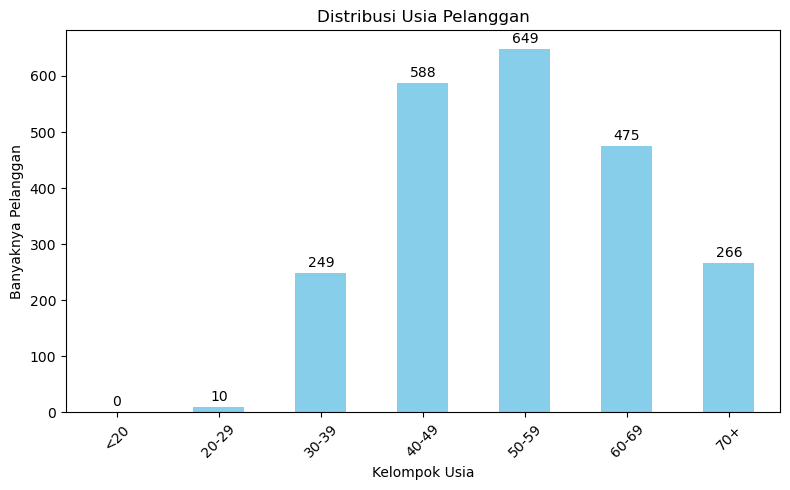

In [18]:
# Menentukan kategori usia berdasarkan Year_Birth
data['Age'] = pd.Timestamp.now().year - data['Year_Birth']
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Menampilkan distribusi usia pembeli
age_distribution = data['Age_Group'].value_counts().sort_index()

# Plotting bar chart untuk distribusi usia pembeli
age_distribution.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Kelompok Usia')
plt.ylabel('Banyaknya Pelanggan')
plt.xticks(rotation=45)

# Menambahkan label jumlah pelanggan di tiap kategori usia
for index, value in enumerate(age_distribution):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Grafik distribusi usia pelanggan menunjukkan bahwa mayoritas pelanggan berada dalam rentang usia 40-59 tahun, dengan jumlah terbanyak terdapat pada kelompok usia 50-59 tahun (649 pelanggan). Kelompok usia yang lebih muda (20-39 tahun) memiliki jumlah yang lebih sedikit, terendah terdapat pada kelompok usia 20-29 tahun (10 pelanggan), sementara kelompok usia di atas 70 tahun (70+) memiliki 266 pelanggan.

In [19]:
print(age_distribution)

<20        0
20-29     10
30-39    249
40-49    588
50-59    649
60-69    475
70+      266
Name: Age_Group, dtype: int64


posx and posy should be finite values
posx and posy should be finite values


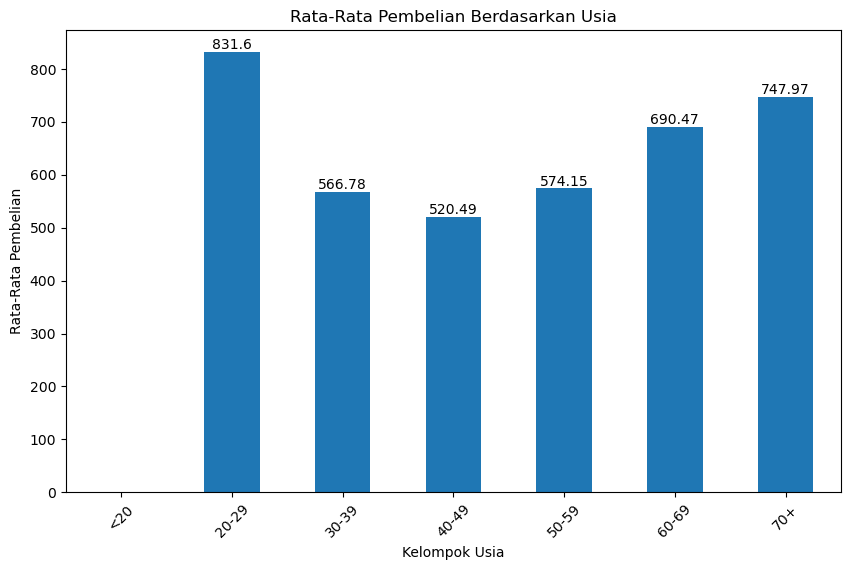

In [20]:
# Menghitung rata-rata pembelian per kelompok usia
average_purchase_by_age = data.groupby('Age_Group')['Total_Purchase'].mean()

# Plotting bar chart untuk rata-rata pembelian per kategori usia
average_purchase_by_age.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-Rata Pembelian Berdasarkan Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-Rata Pembelian')
plt.xticks(rotation=45)

# Menambahkan keterangan jumlah rata-rata pembelian di tiap batang
for i, val in enumerate(average_purchase_by_age):
    plt.text(i, val, round(val, 2), ha='center', va='bottom')

plt.show()


Grafik menunjukkan bahwa rata-rata jumlah pembelian produk berdasarkan kelompok usia pada pembelian 2 tahun terakhir. Kelompok usia 20-29 tahun memiliki rata-rata pembelian tertinggi sebesar 831.6, sementara kelompok usia 40-49 tahun memiliki rata-rata pembelian terendah sekitar 520.49. Ada kecenderungan peningkatan rata-rata pembelian seiring dengan bertambahnya usia seteah usia 50 tahun, dengan kelompok usia 70+ memiliki rata-rata pembelian sekitar 747.97.

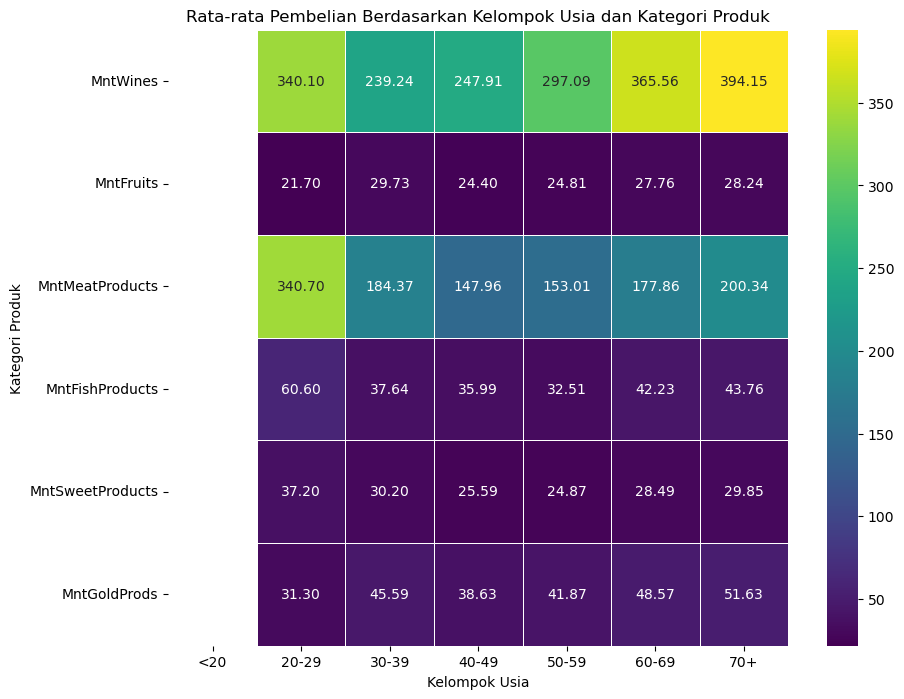

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define purchase columns related to the dataset
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Menghitung rata-rata pembelian per kelompok usia dan kategori produk
purchase_mean_by_age = data.groupby('Age_Group')[purchase_columns].mean().T

# Membuat heatmap untuk visualisasi rata-rata pembelian
plt.figure(figsize=(10, 8))
sns.heatmap(purchase_mean_by_age, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Rata-rata Pembelian Berdasarkan Kelompok Usia dan Kategori Produk')
plt.xlabel('Kelompok Usia')
plt.ylabel('Kategori Produk')
plt.show()


Grafik heatmap menampilkan rata-rata pembelian berbagai kategori produk dalam kelompok usia pada pembelian 2 tahun terakhir. Terlihat bahwa produk Wine (MntWines) adalah yang paling diminati oleh semua kelompok usia, namun kelompok usia 60-69 dan 70+ menonjol dengan pembelian paling tinggi. Di sisi lain, kelompok usia 20-29 cenderung membeli lebih banyak produk daging (MntMeatProducts), ikan (MntFishProducts), dan sweet products (MntSweetProducts). Kelompok usia 30-39 menjadi pembeli utama untuk kategori buah (MntFruits). Sedangkan emas (MntGoldProds) lebih diminati oleh kelompok usia 70+.

In [22]:
from scipy.stats import shapiro

# Melakukan uji normalitas pada kolom Total_Purchase
stat, p = shapiro(data['Total_Purchase'])
print(f'Statistik Shapiro-Wilk: {stat:.3f}, p-value: {p:.3f}')

# Menentukan keputusan berdasarkan nilai p-value
alpha = 0.05
if p > alpha:
    print("Distribusi Total_Purchase terdistribusi secara normal (Tidak bisa menolak H0)")
else:
    print("Distribusi Total_Purchase tidak terdistribusi secara normal (Menolak H0)")


Statistik Shapiro-Wilk: 0.865, p-value: 0.000
Distribusi Total_Purchase tidak terdistribusi secara normal (Menolak H0)


Hasil uji normalitas Shapiro-Wilk menunjukkan bahwa kolom Total_Purchase tidak memiliki distribusi normal karena nilai p-value (0.000) lebih kecil dari alpha (0.05). Karena data tidak berdistribusi normal, langkah selanjutnya adalah menggunakan uji non-parametrik, seperti uji Kruskal-Wallis, untuk mengevaluasi perbedaan dalam rata-rata pembelian antar kelompok usia.

In [23]:
from scipy import stats

# Pisahkan data pembelian sesuai kelompok usia
grouped_data = [data[data['Age_Group'] == group]['Total_Purchase'] for group in data['Age_Group'].unique()]

# Lakukan uji Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*grouped_data)

# Interpretasi hasil uji
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara rata-rata pembelian kelompok usia")
else:
    print("Tidak terdapat perbedaan yang signifikan antara rata-rata pembelian kelompok usia")


Tidak terdapat perbedaan yang signifikan antara rata-rata pembelian kelompok usia


Uji Kruskal-Wallis adalah uji non-parametrik yang digunakan untuk menentukan apakah ada perbedaan signifikan antara tiga atau lebih kelompok independen dari satu variabel dependen yang bersifat ordinal atau interval. 
Hasil uji Kruskal-Wallis menunjukkan bahwa tidak terdapat perbedaan yang signifikan dalam jumlah pembelian antar kelompok usia. Dalam konteks ini, hasil uji menunjukkan bahwa median total pembelian pada kelompok usia yang berbeda tidak menunjukkan perbedaan yang signifikan secara statistik. Oleh karena itu, berdasarkan data yang diamati, tidak ada cukup bukti untuk mendukung adanya perbedaan yang signifikan dalam jumlah pembelian antar kelompok usia yang diuji.

# Berdasarkan Pendidikan

Analisis preferensi pembelian berdasarkan pendidikan membantu kita mengeksplorasi bagaimana kecenderungan belanja berubah seiring dengan tingkat pendidikan seseorang. Hal ini memberikan wawasan yang berharga dalam mengadaptasi penawaran produk dan strategi pemasaran untuk lebih menarik dan sesuai dengan kebutuhan konsumen pada tiap level pendidikan.

Pentingnya pemahaman ini terletak pada kesempatan untuk menyesuaikan pendekatan pemasaran dan produk yang ditawarkan kepada berbagai tingkat pendidikan, sebagaimana yang telah terbukti efektif dalam menganalisis preferensi pembelian berdasarkan usia.

Beberapa masalah yang dapat dijawab dengan analisis ini meliputi:

1. Bagaimana pola pembelian berbeda di antara kelompok pendidikan yang berbeda?  
2. Apakah terdapat perbedaan signifikan dalam preferensi pembelian produk antara kelompok pendidikan?  
3. Produk apa yang lebih diminati oleh kelompok pendidikan tertentu?

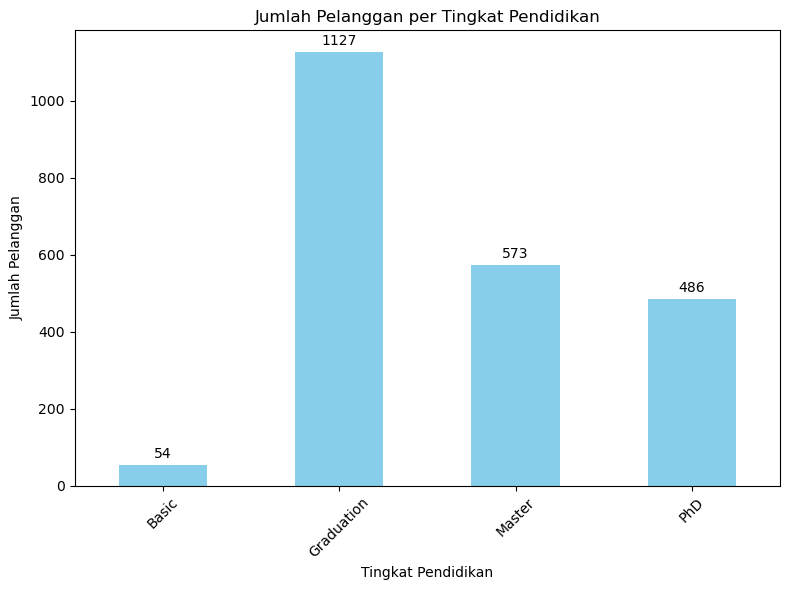

In [24]:
import matplotlib.pyplot as plt

# Menghitung total pembelian per tingkat pendidikan
count_education = data.groupby('Education').size()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
count_education.plot(kind='bar', color='skyblue')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pelanggan')

for i, value in enumerate(count_education):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Pelanggan per Tingkat Pendidikan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Diagram batang tersebut memvisualisasikan jumlah pelanggan berdasarkan tingkat pendidikan. Dari diagram tersebut, terlihat bahwa mayoritas pelanggan memiliki tingkat pendidikan Graduation, dengan jumlah mencapai 1127 orang. Diikuti oleh tingkat pendidikan Master dengan 573 pelanggan, PhD dengan 486 pelanggan, dan Basic dengan jumlah terendah yaitu 54 pelanggan. Ini menunjukkan bahwa sebagian besar pelanggan berada pada tingkat pendidikan Graduation, sementara tingkat pendidikan Basic memiliki jumlah pelanggan yang paling sedikit dalam dataset.

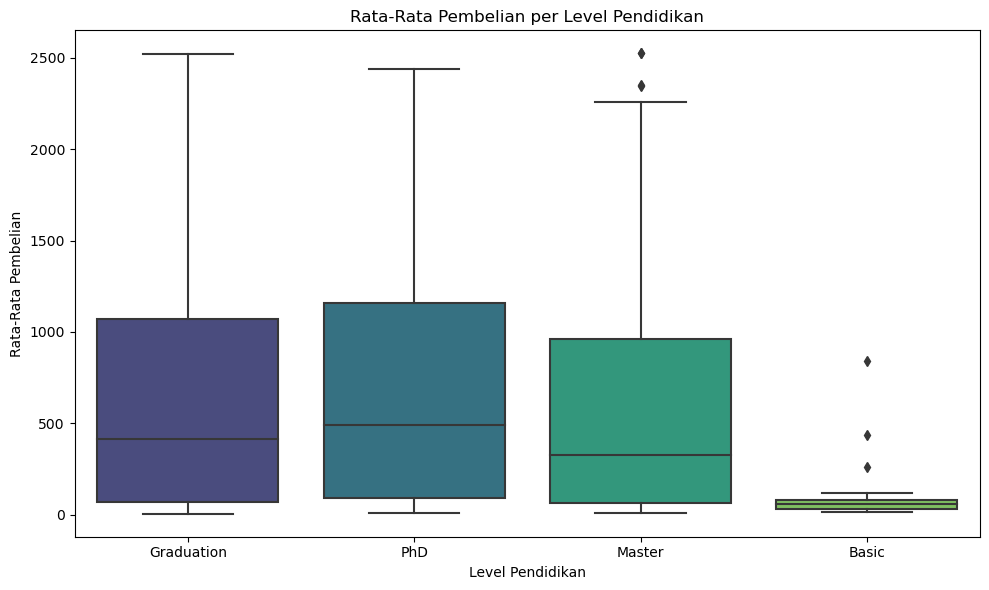

In [25]:
import seaborn as sns

# Membuat data yang sesuai dengan rata-rata pembelian per level pendidikan
box_plot_data = [data[data['Education'] == edu]['Total_Purchase'] for edu in data['Education'].unique()]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total_Purchase', data=data, palette='viridis')
plt.title('Rata-Rata Pembelian per Level Pendidikan')
plt.xlabel('Level Pendidikan')
plt.ylabel('Rata-Rata Pembelian')

plt.tight_layout()
plt.show()


Grafik tersebut menampilkan rata-rata pembelian berdasarkan level pendidikan. Dari grafik, terlihat bahwa rata-rata pembelian pada tingkat pendidikan 'Graduation', meskipun jumlahnya terbanyak, ternyata tidak mendominasi dalam rata-rata pembelian per individu. Tingkat pendidikan 'PhD' menunjukkan rata-rata pembelian tertinggi diikuti oleh 'Master', sementara 'Basic' memiliki rata-rata pembelian yang lebih rendah dibandingkan tingkat pendidikan lainnya. Interpretasi ini menunjukkan bahwa walaupun jumlah pelanggan dari tingkat pendidikan 'Graduation' paling banyak, rata-rata pembelian per individunya cenderung lebih rendah dibandingkan tingkat pendidikan 'PhD' dan 'Master'.

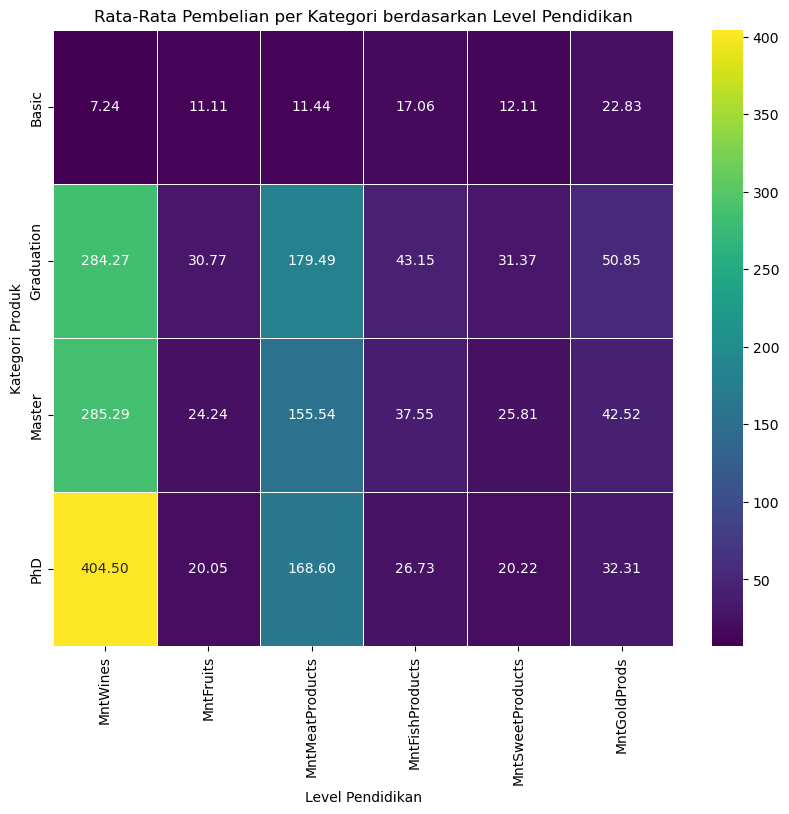

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata pembelian per level pendidikan
purchase_by_education = data.groupby('Education')[purchase_columns].mean()

# Membuat heatmap untuk visualisasi rata-rata pembelian
plt.figure(figsize=(10, 8))
sns.heatmap(purchase_by_education, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Rata-Rata Pembelian per Kategori berdasarkan Level Pendidikan')
plt.xlabel('Level Pendidikan')
plt.ylabel('Kategori Produk')
plt.show()


Berdasarkan heatmap, terlihat bahwa produk Wine (MntWines) menjadi yang paling diminati oleh semua tingkat pendidikan. Namun, pembelian paling tinggi terjadi pada tingkat pendidikan PhD, sementara pada tingkat pendidikan Basic, pembelian produk Wine jauh lebih rendah. Sementara untuk kategori Buah (MntFruits), Daging (MntMeatProducts), Ikan (MntFishProducts), Makanan Manis (MntSweetProducts), dan Emas (MntGoldProds), lebih banyak dibeli oleh mereka dengan tingkat pendidikan Graduation. Meskipun pada tingkat pendidikan Basic rata-rata pembelian cenderung kecil, namun terlihat lebih banyak pembelian produk Emas dibandingkan dengan produk lainnya

In [49]:
from scipy import stats

# Pisahkan data pembelian sesuai level pendidikan
grouped_data = [data[data['Education'] == group]['Total_Purchase'] for group in data['Education'].unique()]

# Lakukan uji Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*grouped_data)

# Interpretasi hasil uji
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara rata-rata pembelian antar level pendidikan")
else:
    print("Tidak terdapat perbedaan yang signifikan antara rata-rata pembelian antar level pendidikan")


Terdapat perbedaan yang signifikan antara rata-rata pembelian antar level pendidikan


Karena pada uji normalitas yang telah dilakukan sebelumnya mendapatkan hasil bahwa variabel total purchase tidak berdistribusi normal, maka pada uji ini digunakan uji non parametrik.
Hasil uji Kruskal-Wallis menunjukkan bahwa terdapat perbedaan yang signifikan dalam jumlah pembelian antar level pendidikan. Ini menyoroti bahwa preferensi pembelian dalam hal level pendidikan memiliki perbedaan yang cukup signifikan secara statistik. Dalam konteks ini, hasil uji memberikan indikasi bahwa tidak semua level pendidikan memiliki kecenderungan pembelian yang serupa, ada variasi yang dapat diamati dalam jumlah pembelian antar kelompok pendidikan yang diuji.

Karena ada perbedaan antara rata-rata pembelian antar level pendidikan maka kita akan melakukan uji lanjutan (uji post-hoc Conover-Iman) untuk melihatUji ini memungkinkan kita untuk mengetahui pasangan level pendidikan mana yang menunjukkan perbedaan signifikan secara spesifik. Dengan demikian, kita dapat mengidentifikasi pasangan level pendidikan yang memiliki perbedaan dalam pembelian yang signifikan.

In [47]:
pip install scikit-posthocs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
from scipy import stats

# Pisahkan data pembelian sesuai level pendidikan
grouped_data = [data[data['Education'] == group]['Total_Purchase'] for group in data['Education'].unique()]

# Lakukan uji Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*grouped_data)

# Interpretasi hasil uji
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara rata-rata pembelian antar level pendidikan")
else:
    print("Tidak terdapat perbedaan yang signifikan antara rata-rata pembelian antar level pendidikan")


Terdapat perbedaan yang signifikan antara rata-rata pembelian antar level pendidikan


matriks tersebut adalah hasil dari uji post-hoc yang menggambarkan nilai-nilai p-value antara pasangan-pasangan kategori pendidikan yang diuji. Dalam konteks ini, nilai-nilai ini mengindikasikan tingkat signifikansi perbedaan antara kelompok-kelompok tersebut. Berikut adalah hasil dari uji posthoc

Nilai pada posisi (1, 2) dan (2, 1) adalah sekitar 0.191. Ini menunjukkan bahwa tidak ada perbedaan signifikan antara kelompok Graduation (1) dan PhD (2).  
Nilai pada posisi (1, 3) dan (3, 1) adalah sekitar 0.191. Ini juga menunjukkan bahwa tidak ada perbedaan signifikan antara Graduation (1) dan Master (3).  
Nilai pada posisi (1, 4) dan (4, 1) adalah sangat kecil, mendekati nol. Ini menunjukkan adanya perbedaan signifikan antara Graduation (1) dan Basic (4), dengan perbedaan yang sangat signifikan secara statistik.  
Nilai pada posisi (2, 3) dan (3, 2) adalah sekitar 0.020. Ini menunjukkan bahwa ada perbedaan yang cukup signifikan secara statistik antara PhD (2) dan Master (3).  
Nilai pada posisi (2, 4) dan (4, 2) adalah sangat kecil, mendekati nol. Ini menunjukkan adanya perbedaan signifikan antara PhD (2) dan Basic (4), dengan perbedaan yang sangat signifikan secara statistik.  
Nilai pada posisi (3, 4) dan (4, 3) adalah sangat kecil, mendekati nol. Ini juga menunjukkan adanya perbedaan signifikan antara Master (3) dan Basic (4), dengan perbedaan yang sangat signifikan secara statistik.

Maka nilai-nilai p-value yang rendah (mendekati nol) antara:

Kelompok Graduation (1) dan Basic (4)  
Kelompok PhD (2) dan Basic (4)  
Kelompok Master (3) dan Basic (4)  

Ini mengindikasikan bahwa ada perbedaan yang signifikan dalam total pembelian antara kelompok-kelompok ini. Dengan demikian, kelompok yang menonjol dengan perbedaan signifikan adalah kelompok Basic (4) dalam hal total pembelian dibandingkan dengan kelompok lainnya (Graduation, PhD, dan Master).

# Berdasarkan Pendapatan

Analisis preferensi pembelian berdasarkan pendapatan memungkinkan kita memahami bagaimana perilaku pembelian berkembang seiring dengan perbedaan pendapatan. Hal ini memberikan kesempatan untuk menyesuaikan tawaran produk dan strategi pemasaran yang lebih sesuai dengan preferensi dan kebutuhan konsumen pada tiap kelompok pendapatan.

kita dapat menjawab beberapa permasalahan terkait dengan pola pembelian berdasarkan perbedaan pendapatan:

1. Bagaimana kecenderungan pembelian produk antara kelompok pendapatan? Apakah terdapat perbedaan pola pembelian antara kelompok pendapatan yang berbeda?  
2. Bagaimana korelasi antara pendapatan dengan pembelian?  
3. Apa produk yang lebih diminati oleh kelompok pendapatan tertentu? Apakah ada perbedaan preferensi pembelian produk antara kelompok pendapatan yang memiliki tingkat penghasilan yang berbeda?

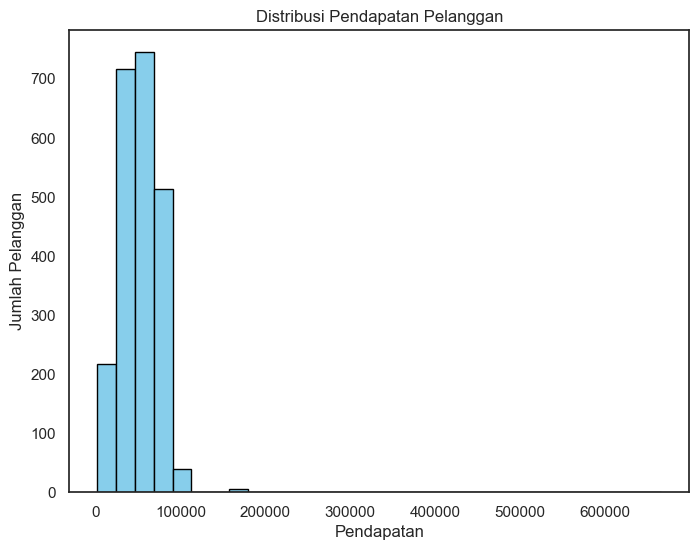

In [45]:
import matplotlib.pyplot as plt

# Plot histogram distribusi pendapatan
plt.figure(figsize=(8, 6))
plt.hist(data['Income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

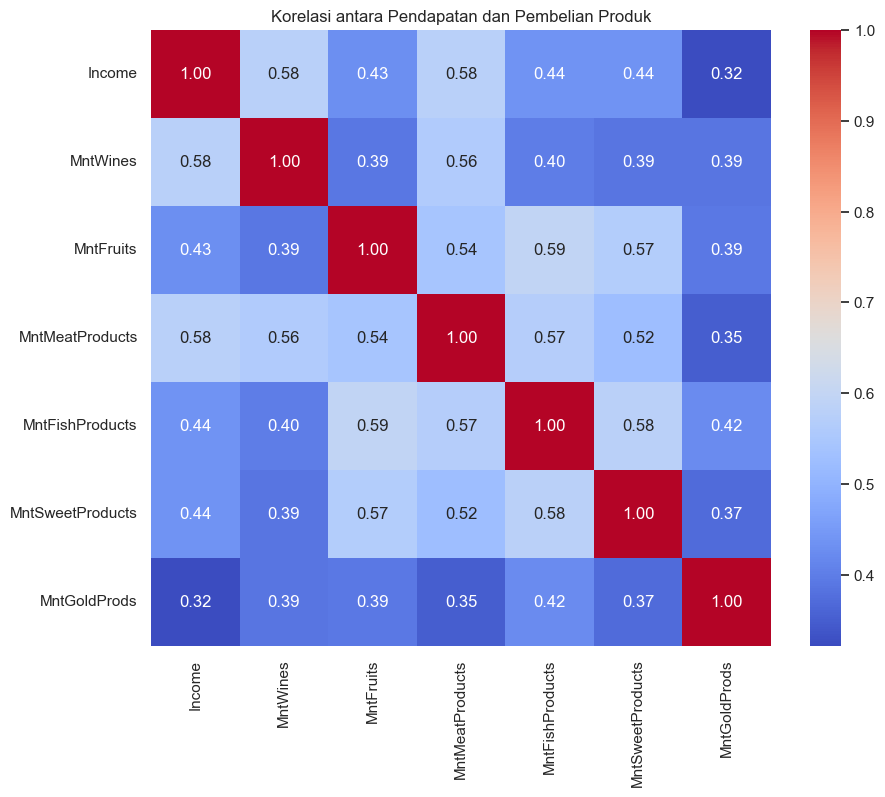

In [46]:
# Menghitung korelasi Pearson antara pendapatan dan setiap kategori produk
correlation_income_purchase = data[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()

# Plotting matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_income_purchase, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Pendapatan dan Pembelian Produk')
plt.show()


Dalam korelasi antara pendapatan (Income) dengan pengeluaran pada berbagai produk (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds), terlihat bahwa pengeluaran pada Wine dan Meat Products memiliki korelasi yang kuat dengan pendapatan. Hal ini menunjukkan bahwa semakin tinggi pendapatan seseorang, semakin besar kemungkinannya untuk menghabiskan uang pada produk-produk tersebut. Korelasi yang kuat juga terlihat pada pengeluaran untuk Fruits dan Fish Products, meskipun sedikit lebih rendah dibandingkan dengan Wine dan Meat Products. Sementara itu, pengeluaran pada Sweet Products dan Gold Prods menunjukkan korelasi yang lebih rendah dengan pendapatan, menandakan adanya faktor lain yang memengaruhi keputusan pembelian produk-produk ini selain tingkat pendapatan.

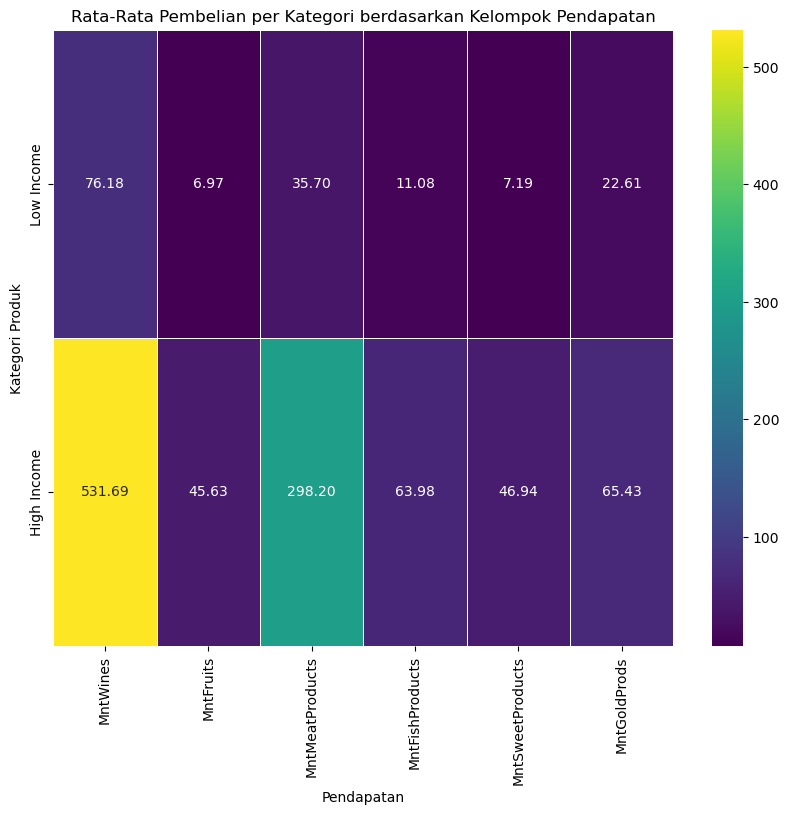

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memisahkan data untuk dua kelompok pendapatan
high_income = data[data['Income'] > data['Income'].median()]['Total_Purchase']
low_income = data[data['Income'] <= data['Income'].median()]['Total_Purchase']

# Menghitung total pembelian per dua kelompok pendapatan
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_by_income = data.groupby(pd.cut(data['Income'], bins=[0, data['Income'].median(), max(data['Income'])], labels=['Low Income', 'High Income']))[purchase_columns].mean()

# Plot heat map untuk total pembelian per dua kelompok pendapatan
plt.figure(figsize=(10, 8))
sns.heatmap(purchase_by_income, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Rata-Rata Pembelian per Kategori berdasarkan Kelompok Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Kategori Produk')
plt.show()


Dalam analisis ini, data pendapatan dibagi menjadi dua kelompok, yaitu high income (di atas median) dan low income (di bawah median).

Dari heatmap, terlihat bahwa baik pada kategori high income maupun low income, pembelian terbanyak terjadi pada produk wine dan daging. Namun, terdapat perbedan dalam jumlah pembelian di antara kedua kelompok, di mana kelompok high income memiliki jumlah pembelian yang jauh lebih besar dibandingkan kelompok low income. Hal ini menunjukkan bahwa meskipun kedua kelompok memiliki preferensi yang mirip terhadap produk tertentu, perbedaan besar terletak pada volume pembelian, di mana kelompok high income cenderung melakukan pembelian dalam jumlah yang lebih besar dibandingkan dengan kelompok low income.

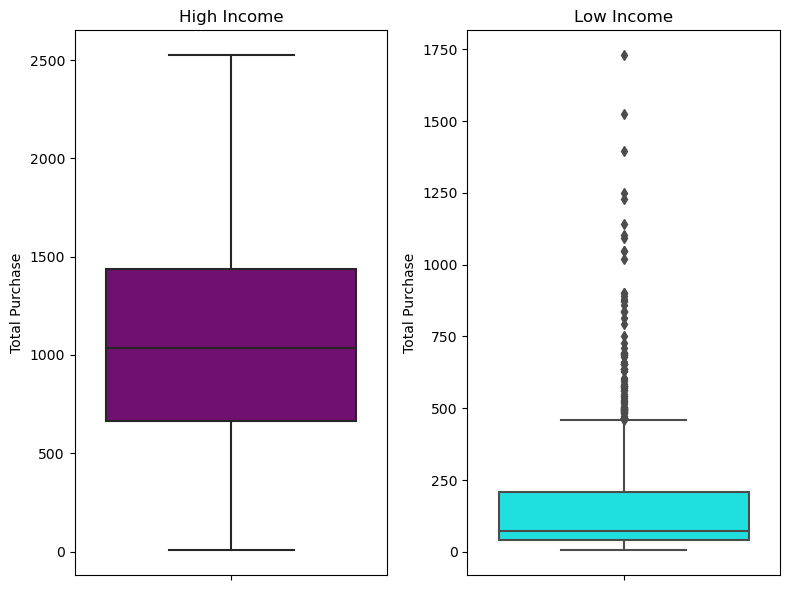

In [32]:
# Membuat boxplot dengan seaborn dan warna yang berbeda
plt.figure(figsize=(8, 6))

# Boxplot untuk high income dengan warna biru
plt.subplot(1, 2, 1)
sns.boxplot(y=high_income, color='purple')
plt.title('High Income')
plt.ylabel('Total Purchase')

# Boxplot untuk low income dengan warna merah
plt.subplot(1, 2, 2)
sns.boxplot(y=low_income, color='cyan')
plt.title('Low Income')
plt.ylabel('Total Purchase')

plt.tight_layout()
plt.show()


Pada boxplot di atas, secara visual, terlihat bahwa kelompok high income memiliki distribusi jumlah pembelian yang cenderung lebih tinggi dibandingkan dengan kelompok low income. Untuk memastikan hal ini, kita akan melakukan pengujian terhadap perbedaan total pembelian pada kedua kelompok.

In [33]:
median_income = data['Income'].median()

from scipy.stats import mannwhitneyu

# Uji Mann-Whitney U test
statistic, p_value = mannwhitneyu(high_income, low_income)
print(f'Statistik U = {statistic}, p-value = {p_value}')

alpha = 0.05  # Tingkat signifikansi

if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam jumlah pembelian antara kedua kelompok pendapatan")
else:
    print("Tidak terdapat perbedaan signifikan dalam jumlah pembelian antara kedua kelompok pendapatan")


Statistik U = 1186233.5, p-value = 4.440662630484793e-292
Terdapat perbedaan signifikan dalam jumlah pembelian antara kedua kelompok pendapatan


Uji Mann-Whitney digunakan untuk memeriksa perbedaan pembelian antara kedua kelompok ini, terutama dalam distribusi yang tidak normal. Hasilnya menunjukkan bahwa terdapat perbedaan signifikan dalam jumlah pembelian antara kedua kelompok pendapatan. Nilai p-value yang sangat rendah, di bawah tingkat signifikansi 0.05, memungkinkan kita untuk menolak hipotesis nol dan menyimpulkan bahwa pola pembelian berbeda secara signifikan antara kelompok high income dan low income. Ini menunjukkan adanya variasi yang signifikan dalam perilaku pembelian antara kedua kelompok, dengan high income cenderung memiliki tingkat pembelian yang berbeda secara signifikan dibandingkan dengan low income.

# 2. evaluasi penjualan pada setiap media penjualan yang telah dilakukan

Analisis preferensi pembelian berdasarkan media penjualan memungkinkan kita mengeksplorasi bagaimana konsumen memilih media pembelian, apakah ada korelasi antara media tersebut, apakah ada perbedaan dalam pola pembelian antar media, serta bagaimana jumlah keluhan berbeda di setiap media penjualan. Analisis ini bertujuan untuk memberikan pemahaman yang lebih mendalam mengenai preferensi konsumen dan pola pembelian, membantu dalam menyesuaikan strategi pemasaran, dan meningkatkan pengalaman pelanggan di berbagai platform penjualan.

Berikut adalah permasalahan yang dapat dijawab melalui analisis ini

1. Bagaimana preferensi pembelian konsumen berdasarkan pada media penjualan yang digunakan (Toko fisik, Situs Web, Katalog)?  
2. Bagaimana korelasi antara media penjualan (Toko, Situs Web, Katalog) dalam hal preferensi dan jumlah pembelian?  
3. Apakah terdapat perbedaan signifikan dalam pola pembelian antar media penjualan yang berbeda?  


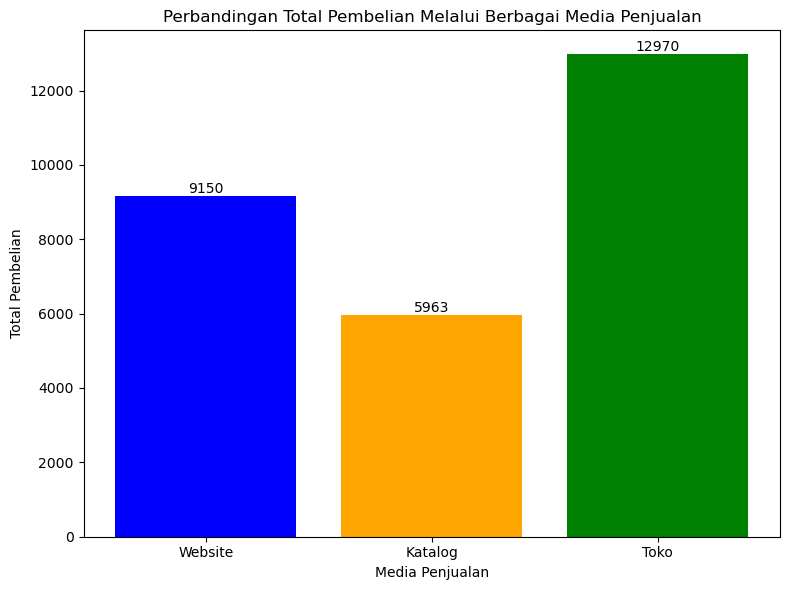

In [34]:
import matplotlib.pyplot as plt

# Menghitung total pembelian melalui berbagai media
total_web_purchases = data['NumWebPurchases'].sum()
total_catalog_purchases = data['NumCatalogPurchases'].sum()
total_store_purchases = data['NumStorePurchases'].sum()

# Jenis-jenis media penjualan
media = ['Website', 'Katalog', 'Toko']
total_purchases = [total_web_purchases, total_catalog_purchases, total_store_purchases]

# Plotting perbandingan total pembelian melalui berbagai media penjualan
plt.figure(figsize=(8, 6))
plt.bar(media, total_purchases, color=['blue', 'orange', 'green'])
plt.title('Perbandingan Total Pembelian Melalui Berbagai Media Penjualan')
plt.xlabel('Media Penjualan')
plt.ylabel('Total Pembelian')


for i, value in enumerate(total_purchases):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()



Diagram batang tersebut menggambarkan perbandingan total pembelian melalui tiga media penjualan: Website, Katalog, dan Toko. Dari nilai yang tertera pada diagram, pembelian melalui Toko memunculkan angka tertinggi dengan nilai 12970, menunjukkan bahwa toko fisik menjadi preferensi utama dalam volume pembelian. Meskipun Website (9150) dan Katalog (5963) menunjukkan kontribusi yang signifikan, nilai pembelian Toko yang jauh lebih tinggi menandakan bahwa mayoritas pembelian dilakukan secara langsung di toko daripada melalui media online atau katalog.

In [38]:
import pandas as pd
from scipy.stats import f_oneway

# Ambil subset dataset yang diperlukan
sales_data = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Lakukan Anova One-Way
f_stat, p_value = f_oneway(sales_data['NumWebPurchases'], sales_data['NumCatalogPurchases'], sales_data['NumStorePurchases'])

# Tampilkan hasil
print(f'Nilai F-statistic: {f_stat:.2f}')
print(f'Nilai p-value: {p_value:.4f}')

# Penentuan keputusan
alpha = 0.05  # tingkat signifikansi
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara setidaknya dua grup media penjualan dalam rata-rata pembelian.")
else:
    print("Tidak ada perbedaan yang signifikan antara grup media penjualan dalam rata-rata pembelian.")


Nilai F-statistic: 614.28
Nilai p-value: 0.0000
Terdapat perbedaan yang signifikan antara setidaknya dua grup media penjualan dalam rata-rata pembelian.


Hasil uji Anova One-Way menunjukkan nilai F-statistic sebesar 614.28 dengan nilai p-value sangat rendah, mendekati nol (p-value < 0.0001). Dalam konteks ini, karena nilai p-value sangat kecil dibandingkan dengan tingkat signifikansi yang ditetapkan (0.05), kita menolak hipotesis nol yang menyatakan tidak ada perbedaan antara grup media penjualan dalam rata-rata pembelian. Dengan demikian, terdapat bukti yang cukup kuat untuk menyimpulkan bahwa setidaknya dua grup media penjualan memiliki perbedaan yang signifikan dalam rata-rata pembelian.

# 3. efektivitas promosi yang telah dilakukan

Analisis efektivitas promosi merupakan langkah penting untuk memahami seberapa berhasil upaya pemasaran menarik minat pelanggan. Dalam analisis ini, kita berusaha mengeksplorasi seberapa efektifnya kampanye promosi yang telah dilakukan dalam menggerakkan respons dari pelanggan. Beberapa permasalahan yang akan dijawab melalui analisis ini mencakup:

1. Apakah terdapat hubungan antara kampanye promosi dengan total pembelian yang dilakukan pelanggan?
2. Bagaimana perbandingan antara penjualan yang melibatkan diskon dan tanpa diskon?

In [39]:
import pandas as pd

# Memilih kolom kampanye untuk dihitung proporsinya
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Menghitung proporsi pelanggan yang menerima tawaran dari setiap kampanye
campaign_acceptance = data[campaigns].mean() * 100  # Mengalikan dengan 100 untuk mendapatkan persentase

# Menampilkan hasil
print("Proporsi Pelanggan yang Menerima Tawaran dari Setiap Kampanye:")
print(campaign_acceptance)


Proporsi Pelanggan yang Menerima Tawaran dari Setiap Kampanye:
AcceptedCmp1    6.428571
AcceptedCmp2    1.339286
AcceptedCmp3    7.276786
AcceptedCmp4    7.455357
AcceptedCmp5    7.276786
dtype: float64


Proporsi Pelanggan yang Menerima Tawaran dari Setiap Kampanye menunjukkan variabilitas yang cukup signifikan antara kampanye-kampanye yang berbeda. Kampanye ke-4 (AcceptedCmp4) memiliki tingkat penerimaan tertinggi dengan persentase sebesar 7.46%, disusul oleh Kampanye ke-3 (AcceptedCmp3) dan Kampanye ke-5 (AcceptedCmp5) yang memiliki nilai proporsi yang hampir sama sekitar 7.28%. Kampanye ke-1 (AcceptedCmp1) menunjukkan tingkat penerimaan yang lebih rendah dibandingkan dengan yang lain, yaitu sekitar 6.43%. Sementara Kampanye ke-2 (AcceptedCmp2) memiliki tingkat penerimaan terendah dengan hanya sekitar 1.34%. Interpretasi ini menyoroti perbedaan dalam efektivitas kampanye-kampanye tersebut dalam menarik minat pelanggan, dengan Kampanye ke-4 menonjol sebagai yang paling sukses dalam menarik respons pelanggan.

Selanjutnya kita akan melihat apakah pelanggan yang melakukan lebih banyak pembelian dengan diskon (NumDealsPurchases) cenderung menerima lebih banyak tawaran kampanye atau memiliki tingkat respons yang berbeda terhadap kampanye-kampanye tersebut.

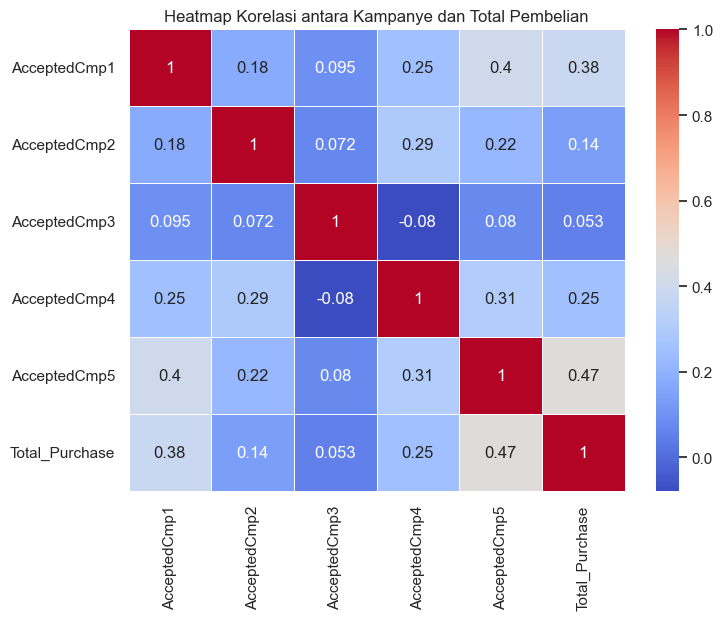

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat subset data yang berisi kolom-kolom terkait penerimaan kampanye dan jumlah pembelian
campaign_data = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Total_Purchase']]

# Menghitung korelasi antara variabel penerimaan kampanye dan jumlah pembelian
correlation_matrix = campaign_data.corr()

# Membuat heatmap dari matriks korelasi
sns.set(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi antara Kampanye dan Total Pembelian')
plt.show()

 Terlihat adanya korelasi positif yang signifikan antara penerimaan kampanye AcceptedCmp1, AcceptedCmp4, dan AcceptedCmp5 dengan jumlah total pembelian, menandakan bahwa pelanggan yang menerima tawaran dari kampanye-kampanye ini cenderung melakukan lebih banyak pembelian. Sebaliknya, korelasi antara AcceptedCmp2 dan AcceptedCmp3 dengan Total_Purchase lebih rendah, menunjukkan hubungan yang lebih lemah antara tawaran dari kampanye-kampanye ini dengan aktivitas pembelian. Hal ini memberikan gambaran bahwa respons terhadap kampanye tertentu dapat memengaruhi perilaku pembelian, meskipun tingkat pengaruhnya bervariasi di setiap kampanye.

C:\Users\Selgi\AppData\Local\Temp\ipykernel_22760\3515623440.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_responsed['Last_Campaign_Responsed'] = customers_responsed[respons_campaigns].idxmax(axis=1)


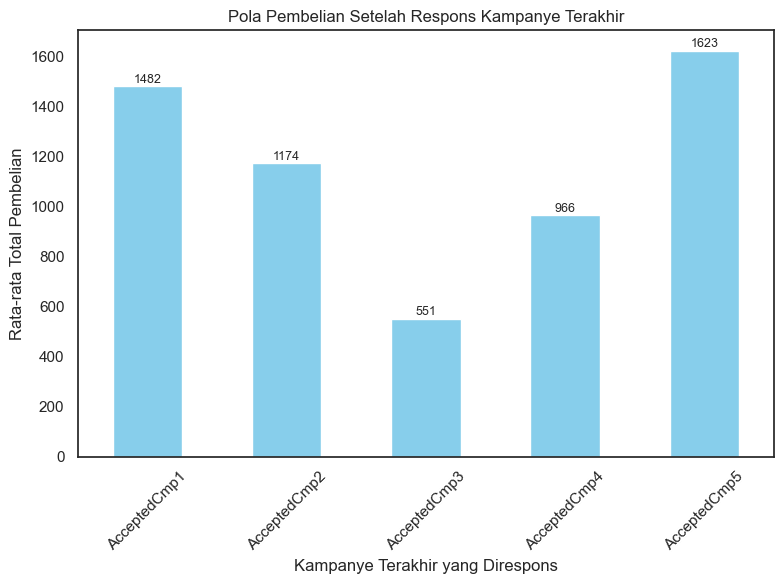

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data hanya untuk pelanggan yang respons terhadap kampanye
respons_campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
customers_responsed = data[data[respons_campaigns].any(axis=1)]

# Buat kolom tambahan untuk menandai respons terhadap kampanye terakhir
customers_responsed['Last_Campaign_Responsed'] = customers_responsed[respons_campaigns].idxmax(axis=1)

# Kelompokkan berdasarkan respons terakhir kampanye
grouped_by_last_campaign = customers_responsed.groupby('Last_Campaign_Responsed')['Total_Purchase'].mean()

# Visualisasi pola pembelian setelah respons kampanye
plt.figure(figsize=(8, 6))
grouped_by_last_campaign.plot(kind='bar', color='skyblue')
plt.title('Pola Pembelian Setelah Respons Kampanye Terakhir')
plt.xlabel('Kampanye Terakhir yang Direspons')
plt.ylabel('Rata-rata Total Pembelian')
plt.xticks(rotation=45)

# Menambahkan label nilai di atas batang
for i, value in enumerate(grouped_by_last_campaign):
    plt.text(i, value + 2, f'{value:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Berdasarkan diagram batang,  terlihat bahwa kampanye dengan kode AcceptedCmp5 memiliki rata-rata total pembelian tertinggi sebesar 1623, diikuti oleh kampanye AcceptedCmp1 dengan rata-rata total pembelian sekitar 1482. Namun, kampanye AcceptedCmp3 memiliki rata-rata total pembelian yang lebih rendah dibandingkan kampanye lainnya, yakni sekitar 551. Perbedaan nilai rata-rata ini bisa mengindikasikan efektivitas relatif dari masing-masing kampanye dalam mendorong pelanggan untuk melakukan pembelian setelah merespons kampanye. Kampanye dengan rata-rata total pembelian lebih tinggi cenderung lebih berhasil dalam mendorong pembelian dibandingkan dengan kampanye lain yang memiliki rata-rata total pembelian yang lebih rendah.


Selanjutnya kita akan melihat jumlah pembelian antara yang menggunakan diskon dan tidak menggunakan diskon.

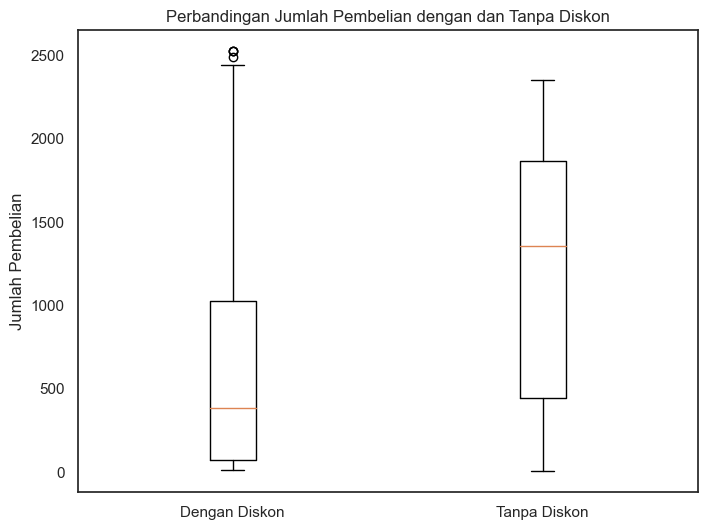

In [42]:
import matplotlib.pyplot as plt

# Memisahkan data antara yang memiliki pembelian dengan diskon dan yang tidak
purchase_with_deals = data[data['NumDealsPurchases'] > 0]['Total_Purchase']
purchase_without_deals = data[data['NumDealsPurchases'] == 0]['Total_Purchase']

# Menggabungkan data untuk boxplot
data_to_plot = [purchase_with_deals, purchase_without_deals]

# Membuat boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['Dengan Diskon', 'Tanpa Diskon'])
plt.title('Perbandingan Jumlah Pembelian dengan dan Tanpa Diskon')
plt.ylabel('Jumlah Pembelian')
plt.show()


terlihat bahwa jumlah pembelian dengan diskon lebih rendah daripada yang tanpa diskon. Pelanggan cenderung melakukan lebih sedikit pembelian dengan diskon dibandingkan dengan pembelian tanpa diskon. Ini menimbulkan pertanyaan apakah diskon tidak selalu menjadi pemicu utama dalam pembelian, atau mungkin strategi diskon yang digunakan belum cukup efektif dalam menarik minat pelanggan untuk membeli. Evaluasi ulang pada strategi pemasaran diperlukan untuk memahami lebih dalam preferensi pelanggan terkait insentif pembelian seperti diskon.

Selanjutnya kita uji perbedaan antara yang menggunakan diskon dan tidak diskon, sebelumnya kita cek dulu asumsi normalitas dan homogenitasnnya

In [43]:
from scipy.stats import shapiro, levene

# Memisahkan data antara pelanggan dengan dan tanpa pembelian diskon
purchase_with_deals = data[data['NumDealsPurchases'] > 0]
purchase_without_deals = data[data['NumDealsPurchases'] == 0]

# Menghitung rata-rata respons kampanye untuk kedua kelompok
mean_response_with_deals = purchase_with_deals[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()
mean_response_without_deals = purchase_without_deals[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()

normality_test_deals = shapiro(mean_response_with_deals)
normality_test_nodeals = shapiro(mean_response_without_deals)

variance_test = levene(mean_response_with_deals, mean_response_without_deals)


# Interpretasi hasil tes normalitas
if normality_test_deals.pvalue > 0.05 and normality_test_nodeals.pvalue > 0.05:
    print("Asumsi normalitas terpenuhi untuk kedua kelompok.")
else:
    print("Minimal satu kelompok tidak memenuhi asumsi normalitas.")

# Interpretasi hasil tes homogenitas varians
if variance_test.pvalue > 0.05:
    print("Asumsi homogenitas varians terpenuhi.")
else:
    print("Asumsi homogenitas varians tidak terpenuhi.")


Minimal satu kelompok tidak memenuhi asumsi normalitas.
Asumsi homogenitas varians tidak terpenuhi.


Karena data tidak emmenuhi asumsi normalitas dan homogenitas maka uji sleanjutnya akan dilakukan dengan uji non parametrik

In [44]:
from scipy.stats import mannwhitneyu

# Melakukan uji Mann-Whitney
u_stat, p_value = mannwhitneyu(mean_response_with_deals, mean_response_without_deals)

# Menampilkan hasil uji
print(f"Nilai u-statistic: {u_stat}")
print(f"Nilai p-value: {p_value}")

# Interpretasi hasil uji Mann-Whitney
if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan antara kedua kelompok.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kedua kelompok.")


Nilai u-statistic: 2.0
Nilai p-value: 0.03614514204656228
Terdapat perbedaan yang signifikan antara kedua kelompok.


Hasil uji Mann-Whitney menunjukkan nilai p-value sebesar 0.036, yang lebih kecil dari tingkat signifikansi yang ditetapkan (0.05). Hal ini menunjukkan bahwa terdapat perbedaan yang signifikan antara kedua kelompok dalam respons terhadap kampanye dengan diskon dan tanpa diskon. Dengan demikian, hasil ini menunjukkan bahwa respons terhadap kampanye memiliki perbedaan yang signifikan antara pelanggan yang melakukan pembelian dengan diskon dan yang tidak.

# KESIMPULAN

**1. Preferensi Pembelian berdasarkan Profil Pelanggan**  
*a. Usia*  
Berdasarkan analisis preferensi pembelian berdasarkan usia, dapat disimpulkan bahwa terdapat variasi dalam pola pembelian antar kelompok usia. Mayoritas pelanggan Supermarket XYZ berada dalam rentang usia 40-59 tahun, namun terdapat perbedaan preferensi produk antar kelompok usia. Kelompok usia muda (20-29 tahun) cenderung lebih tertarik pada produk daging, ikan, dan produk manis, sementara kelompok usia di atas 70 tahun lebih menyukai produk Wine dan emas. Meskipun terlihat ada perbedaan dalam preferensi pembelian produk antar kelompok usia, Ketika kita melakukan uji statistik mengenai rata-rata pembelian antar kelompok usia dengan Kruskal-Wallis menunjukkan bahwa tidak terdapat perbedaan signifikan dalam jumlah pembelian secara keseluruhan antar kelompok usia yang diuji. Dengan demikian, dapat disimpulkan bahwa perbedaan rata-rata pembelian yang terjadi antar kelompok usia tidak signifikan.

*b. Pendidikan*  
Berdasarkan analisis preferensi pembelian berdasarkan tingkat pendidikan, ditemukan variasi yang signifikan dalam pola pembelian antar kelompok pendidikan. Mayoritas pelanggan Supermarket XYZ memiliki tingkat pendidikan Graduation, namun terdapat perbedaan rata-rata pembelian yang signifikan pada tingkat pendidikan yang berbeda. Kelompok PhD dan Master menonjol dengan rata-rata pembelian tertinggi, sementara kelompok Basic memiliki rata-rata pembelian yang lebih rendah. Uji post-hoc menegaskan perbedaan signifikan antara kelompok Basic dengan kelompok Graduation, PhD, dan Master dalam hal rata-rata pembelian. Oleh karena itu, penyesuaian strategi pemasaran dan penawaran produk yang lebih spesifik per tingkat pendidikan dapat menjadi pendekatan yang efektif untuk memenuhi preferensi dan kebutuhan konsumen.   

*c. Pendapatan*
Dari hasil analisis preferensi pembelian berdasarkan pendapatan, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam pola pembelian antara kelompok high income dan low income. Kelompok high income menunjukkan kecenderungan memiliki jumlah pembelian yang lebih tinggi dibandingkan dengan kelompok low income. Korelasi antara pendapatan dengan pengeluaran pada produk tertentu, seperti Wine dan Meat Products, menunjukkan bahwa semakin tinggi pendapatan seseorang, semakin besar kemungkinannya untuk menghabiskan uang pada produk tersebut. Jika dilihat dari preferensi di setiap produk, terlihat bahwa preferensi produk umumnya serupa di kedua kelompok, namun kelompok high income cenderung melakukan pembelian dalam jumlah yang lebih besar, khususnya pada produk Wine dan daging. Uji Mann-Whitney juga memvalidasi perbedaan signifikan dalam jumlah pembelian antara kedua kelompok pendapatan. Oleh karena itu, pemahaman yang mendalam terkait preferensi pembelian berdasarkan tingkat pendapatan memberikan peluang bagi pengembangan strategi pemasaran yang lebih terfokus dan penyesuaian tawaran produk yang dapat lebih efektif memenuhi kebutuhan konsumen pada masing-masing kelompok pendapatan.

**2. Evaluasi Penjualan pada Setiap Media Penjualan**    
Berdasarkan analisis preferensi pembelian berdasarkan media penjualan, disimpulkan bahwa pembelian melalui toko fisik mendominasi dibandingkan media penjualan lainnya. Hasil analisis korelasi menunjukkan keterkaitan positif yang kuat antara pembelian di toko dengan pembelian melalui katalog dan situs web. Uji Anova One-Way menegaskan perbedaan signifikan dalam rata-rata pembelian antar media penjualan.  Oleh karena itu, strategi pemasaran yang lebih terfokus dan penyesuaian pengalaman pelanggan mungkin perlu difokuskan pada preferensi dan pola pembelian yang berbeda di setiap media penjualan.

 **3. Efektivitas Promosi yang Telah Dilakukan**  
Dari analisis kampanye promosi, terlihat bahwa Kampanye ke-4 (AcceptedCmp4) paling berhasil menarik minat pelanggan dengan tingkat penerimaan tertinggi. Korelasi positif signifikan antara penerimaan beberapa kampanye dan jumlah total pembelian menunjukkan bahwa respons terhadap kampanye memengaruhi perilaku pembelian. Namun, dalam perbandingan antara penjualan dengan diskon dan tanpa diskon, terlihat bahwa jumlah pembelian dengan diskon lebih rendah, menunjukkan perlunya evaluasi ulang pada strategi pemasaran, terutama penerapan diskon, untuk meningkatkan efektivitas kampanye promosi. Uji Mann-Whitney mengindikasikan perbedaan signifikan dalam respons terhadap kampanye antara pelanggan yang melakukan pembelian dengan diskon dan tanpa diskon, menyoroti pentingnya memahami preferensi pelanggan dalam merancang kampanye yang lebih efektif.  


# Saran

Berdasarkan analisis yang telah dilakukan, terdapat beberapa saran yang dapat membantu meningkatkan pemahaman terhadap perilaku belanja pelanggan, yang pada akhirnya dapat meningkatkan kepuasan mereka. 

1. penting untuk melakukan segmentasi yang lebih mendalam berdasarkan usia, pendidikan, dan pendapatan untuk memahami preferensi pembelian yang berbeda. Dengan pemahaman ini, produk dan strategi pemasaran dapat disesuaikan untuk lebih menarik dan relevan bagi setiap segmen pelanggan.

2. Meskipun pembelian melalui toko fisik masih dominan, ada peluang untuk meningkatkan pengalaman pembelian online. Berdasarkan perbedaan dalam rata-rata pembelian, dapat difokuskan upaya untuk meningkatkan navigasi situs web dan katalog agar lebih menarik bagi pelanggan.

3. kita dapat melakukan evaluasi kampanye promosi untuk mengidentifikasi elemen-elemen yang membuat kampanye seperti AcceptedCmp4 lebih berhasil. Kita dapat fokus pada kampanye promosi yang efektif. Memilih dan meningkatkan kampanye yang memiliki respons tinggi sambil mengevaluasi kampanye dengan respons rendah akan membantu dalam menyaring strategi promosi yang lebih berhasil.

4. Meskipun diskon penting, respons pelanggan menunjukkan perbedaan dalam preferensi pembelian dengan dan tanpa diskon. Diperlukan peninjauan ulang strategi diskon dengan mempertimbangkan alternatif seperti bundling produk atau insentif lainnya yang mungkin lebih menarik. 

5.  Meskipun tidak ada perbedaan signifikan dalam jumlah keluhan antar media penjualan, perlu diperhatikan pola keluhan pada toko fisik untuk meningkatkan layanan. Melalui pemantauan yang rutin terhadap kinerja kampanye serta eksperimen dengan layanan, perusahaan dapat meningkatkan pengalaman pelanggan dan mengurangi keluhan yang diterima.